In [51]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np

import pandas as pd
enrollment = pd.read_csv('../data/enrollment.csv')

enrollment.head()

,AHS CapstoneSpring Pre-registration,History and Society Bodies in Motion: Migration...,Arts and Humanities,Arts and Humanities The Quest,"Arts, Humanities, Social ScienceFoundation with Rhetoric ""Double Wide"" AHS","History of TechnologyFoundation: Technology, Societyand the Environment",Responsive Drawing and VisualThinking,Technology in American History,"The Wired Ensemble -Instruments, Voices, Players",Seeing and Hearing:Communicating w/ PhotographsVideo and Sound,...,Seminar: Intro to Pneumatic andHydraulic Systems,Seminar: Musical InstrumentDesign and Engineering,Seminar: Introductory PowerSupplies,Seminar: Danger! High Voltage!,Seminar: Five More Skills forSoftware Designers,Seminar: Data Dashboard Design,Seminar: Intro Embedded Software,Introduction to Sustainability,Sustainability Synthesis,studentid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,10136845
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,10191843
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,10208842
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,10324389
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,10463379


In [52]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

# only use graduated students
students = pd.read_csv('../data/student.csv')
students = students[students.finalyear < 2016]
enrollment = enrollment[enrollment.studentid.isin(students.studentid)]

# majors = students.finalmajor_full.unique()
n_clusters = 8

X = enrollment.apply(lambda x: [int(val) for val in x])
X.drop('studentid', inplace=True, axis=1)

In [53]:
kmeans = KMeans(n_clusters=n_clusters)
affinity = AffinityPropagation()
spectral = SpectralClustering(n_clusters=n_clusters)

T_kmeans = kmeans.fit_predict(X.values)
T_affinity = affinity.fit_predict(X.values)
# T_spectral = spectral.fit_predict(X.values)

In [54]:
# find average majors
major_counts = {}
for (index, cluster) in enumerate(T_kmeans):
    major_counts[cluster] = major_counts.get(cluster, {})
    
    student_id = enrollment.iloc[index].studentid
    major = students[students.studentid==student_id].iloc[0]['finalmajor_full']
    major_counts[cluster][major] = major_counts[cluster].get(major, 0) + 1
    
for cluster in major_counts.keys():
#     print major_counts[cluster]
    print max(major_counts[cluster].iterkeys(), key=(lambda key: major_counts[cluster][key]))

Electr'l & Computer Engr
Mechanical Engineering
Mechanical Engineering
Electr'l & Computer Engr
Undeclared
Mechanical Engineering
Electr'l & Computer Engr
Mechanical Engineering


ME
count    94.000000
mean      1.202128
std       1.205541
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       6.000000
Name: me, dtype: float64

ECE
count    94.000000
mean      6.361702
std       2.543603
min       1.000000
25%       4.250000
50%       7.000000
75%       8.000000
max      13.000000
Name: ece, dtype: float64


BIO
count    94.000000
mean      0.148936
std       0.438900
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       3.000000
Name: bio, dtype: float64

DESIGN
count    94.000000
mean      3.244681
std       0.599035
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: design, dtype: float64

CS
count    94.000000
mean      2.478723
std       1.389118
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: cs, dtype: float64



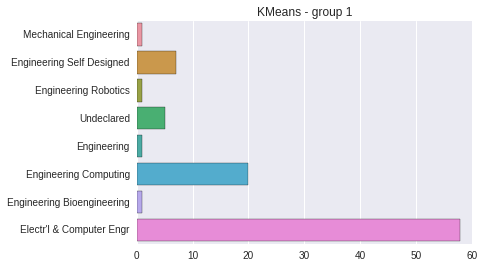

ME
count    130.000000
mean       5.161538
std        2.786467
min        0.000000
25%        3.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: me, dtype: float64

ECE
count    130.000000
mean       2.238462
std        1.205953
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: ece, dtype: float64


BIO
count    130.000000
mean       0.838462
std        1.508651
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: bio, dtype: float64

DESIGN
count    130.000000
mean       3.830769
std        1.336074
min        1.000000
25%        3.000000
50%        3.000000
75%        4.750000
max        9.000000
Name: design, dtype: float64

CS
count    130.000000
mean       0.476923
std        0.717612
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: cs, dtype: float64



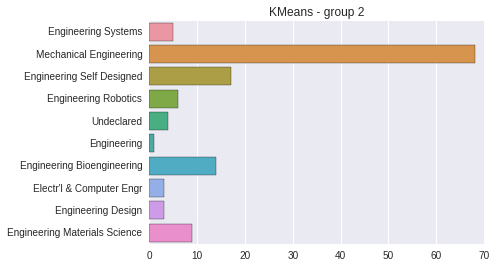

ME
count    71.000000
mean      2.859155
std       2.392224
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       9.000000
Name: me, dtype: float64

ECE
count    71.000000
mean      3.802817
std       2.364135
min       2.000000
25%       2.000000
50%       3.000000
75%       5.000000
max      10.000000
Name: ece, dtype: float64


BIO
count    71.000000
mean      0.873239
std       1.646898
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       6.000000
Name: bio, dtype: float64

DESIGN
count    71.000000
mean      3.380282
std       0.990904
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: design, dtype: float64

CS
count    71.000000
mean      1.507042
std       1.217412
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: cs, dtype: float64



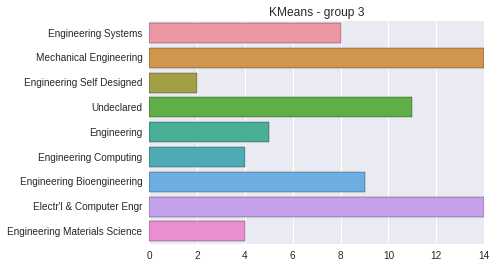

ME
count    161.000000
mean       2.503106
std        2.748009
min        0.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: me, dtype: float64

ECE
count    161.000000
mean       2.906832
std        2.425905
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       11.000000
Name: ece, dtype: float64


BIO
count    161.000000
mean       0.354037
std        0.983679
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: bio, dtype: float64

DESIGN
count    161.000000
mean       3.217391
std        1.403993
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: design, dtype: float64

CS
count    161.000000
mean       2.173913
std        2.075347
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        8.000000
Name: cs, dtype: float64



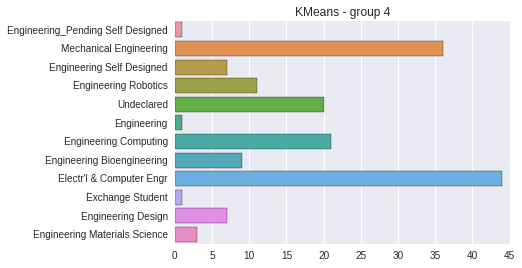

ME
count    75.000000
mean      3.693333
std       2.594033
min       1.000000
25%       1.000000
50%       3.000000
75%       6.000000
max       9.000000
Name: me, dtype: float64

ECE
count    75.000000
mean      2.866667
std       2.412430
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      11.000000
Name: ece, dtype: float64


BIO
count    75.000000
mean      0.613333
std       1.250874
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       5.000000
Name: bio, dtype: float64

DESIGN
count    75.000000
mean      2.440000
std       0.947828
min       0.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: design, dtype: float64

CS
count    75.000000
mean      1.053333
std       1.272297
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       5.000000
Name: cs, dtype: float64



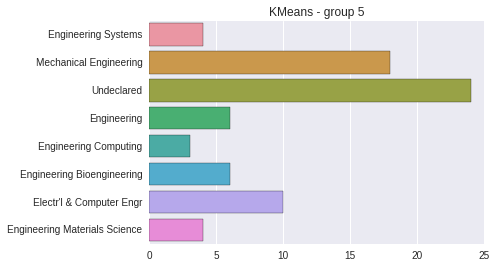

ME
count    75.000000
mean      2.640000
std       1.835388
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       7.000000
Name: me, dtype: float64

ECE
count    75.000000
mean      3.440000
std       1.817631
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       8.000000
Name: ece, dtype: float64


BIO
count    75.000000
mean      1.400000
std       1.115008
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       5.000000
Name: bio, dtype: float64

DESIGN
count    75.000000
mean      3.386667
std       0.836552
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: design, dtype: float64

CS
count    75.00000
mean      1.12000
std       1.22981
min       0.00000
25%       0.00000
50%       1.00000
75%       2.00000
max       5.00000
Name: cs, dtype: float64



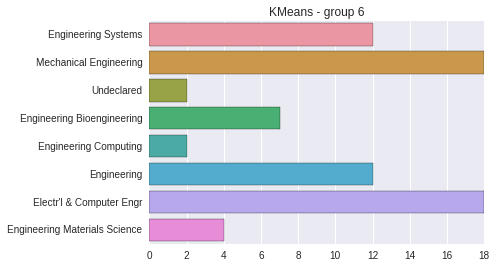

ME
count    99.000000
mean      1.848485
std       1.062953
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       7.000000
Name: me, dtype: float64

ECE
count    99.000000
mean      7.383838
std       2.220990
min       2.000000
25%       6.000000
50%       7.000000
75%       9.000000
max      14.000000
Name: ece, dtype: float64


BIO
count    99.000000
mean      0.343434
std       0.518271
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: bio, dtype: float64

DESIGN
count    99.000000
mean      3.242424
std       0.554957
min       3.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       6.000000
Name: design, dtype: float64

CS
count    99.000000
mean      2.121212
std       1.171714
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: cs, dtype: float64



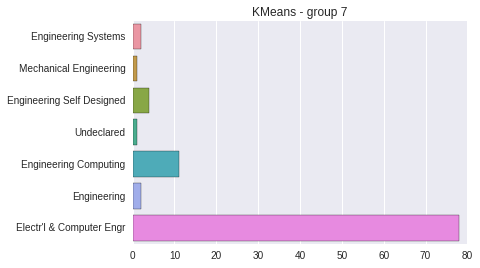

ME
count    146.000000
mean       4.547945
std        2.821304
min        1.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: me, dtype: float64

ECE
count    146.000000
mean       2.232877
std        0.968761
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: ece, dtype: float64


BIO
count    146.000000
mean       1.082192
std        1.577894
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: bio, dtype: float64

DESIGN
count    146.000000
mean       3.746575
std        1.196614
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: design, dtype: float64

CS
count    146.000000
mean       0.835616
std        0.743036
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: cs, dtype: float64



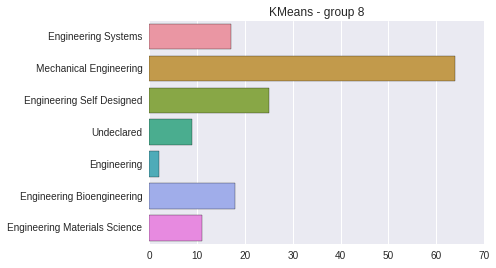

ME
count     5.000000
mean      8.800000
std       1.095445
min       8.000000
25%       8.000000
50%       8.000000
75%      10.000000
max      10.000000
Name: me, dtype: float64

ECE
count    5.00000
mean     2.80000
std      1.30384
min      2.00000
25%      2.00000
50%      2.00000
75%      3.00000
max      5.00000
Name: ece, dtype: float64


BIO
count    5
mean     0
std      0
min      0
25%      0
50%      0
75%      0
max      0
Name: bio, dtype: float64

DESIGN
count    5.000000
mean     3.400000
std      0.547723
min      3.000000
25%      3.000000
50%      3.000000
75%      4.000000
max      4.000000
Name: design, dtype: float64

CS
count    5.000000
mean     0.400000
std      0.547723
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
Name: cs, dtype: float64



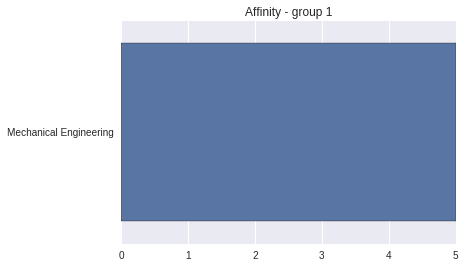

ME
count    15.000000
mean      7.066667
std       0.961150
min       6.000000
25%       6.000000
50%       7.000000
75%       8.000000
max       9.000000
Name: me, dtype: float64

ECE
count    15.000000
mean      1.866667
std       1.245946
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: ece, dtype: float64


BIO
count    15.000000
mean      0.133333
std       0.351866
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: bio, dtype: float64

DESIGN
count    15.000000
mean      3.533333
std       0.990430
min       3.000000
25%       3.000000
50%       3.000000
75%       3.500000
max       6.000000
Name: design, dtype: float64

CS
count    15.000000
mean      0.600000
std       0.632456
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: cs, dtype: float64



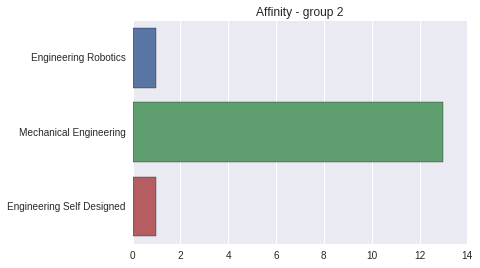

ME
count    10.000000
mean      1.300000
std       0.674949
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: me, dtype: float64

ECE
count    10.000000
mean      2.100000
std       0.316228
min       2.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: ece, dtype: float64


BIO
count    10.000000
mean      3.700000
std       1.494434
min       0.000000
25%       3.250000
50%       4.000000
75%       4.750000
max       5.000000
Name: bio, dtype: float64

DESIGN
count    10.000000
mean      3.500000
std       0.849837
min       3.000000
25%       3.000000
50%       3.000000
75%       3.750000
max       5.000000
Name: design, dtype: float64

CS
count    10.000000
mean      0.800000
std       0.632456
min       0.000000
25%       0.250000
50%       1.000000
75%       1.000000
max       2.000000
Name: cs, dtype: float64



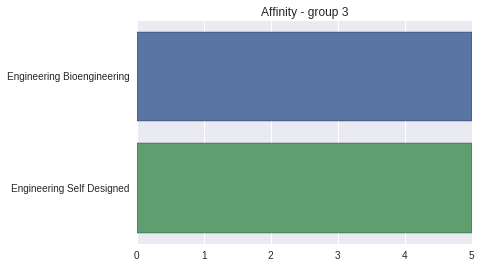

ME
count    18.000000
mean      7.388889
std       1.334558
min       4.000000
25%       7.000000
50%       7.500000
75%       8.000000
max       9.000000
Name: me, dtype: float64

ECE
count    18.000000
mean      1.722222
std       0.958280
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: ece, dtype: float64


BIO
count    18.000000
mean      0.388889
std       0.607685
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: bio, dtype: float64

DESIGN
count    18.000000
mean      4.000000
std       1.455214
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       9.000000
Name: design, dtype: float64

CS
count    18.000000
mean      0.333333
std       0.485071
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: cs, dtype: float64



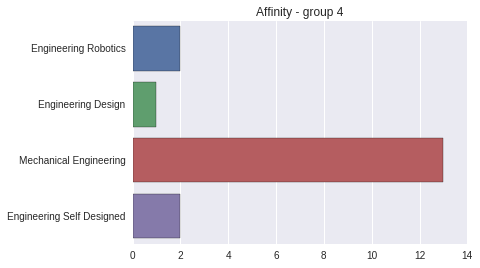

ME
count    9.000000
mean     1.222222
std      0.440959
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000
Name: me, dtype: float64

ECE
count    9
mean     2
std      0
min      2
25%      2
50%      2
75%      2
max      2
Name: ece, dtype: float64


BIO
count    9.000000
mean     4.333333
std      1.322876
min      2.000000
25%      3.000000
50%      5.000000
75%      5.000000
max      6.000000
Name: bio, dtype: float64

DESIGN
count    9.000000
mean     3.111111
std      0.333333
min      3.000000
25%      3.000000
50%      3.000000
75%      3.000000
max      4.000000
Name: design, dtype: float64

CS
count    9.000000
mean     0.777778
std      0.440959
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000
Name: cs, dtype: float64



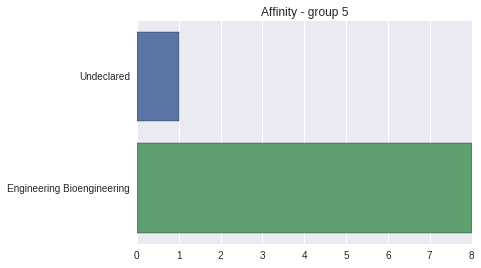

ME
count    6.000000
mean     1.166667
std      0.408248
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000
Name: me, dtype: float64

ECE
count    6.000000
mean     2.333333
std      0.516398
min      2.000000
25%      2.000000
50%      2.000000
75%      2.750000
max      3.000000
Name: ece, dtype: float64


BIO
count    6.000000
mean     3.833333
std      1.471960
min      1.000000
25%      4.000000
50%      4.000000
75%      4.750000
max      5.000000
Name: bio, dtype: float64

DESIGN
count    6.000000
mean     3.833333
std      1.169045
min      3.000000
25%      3.000000
50%      3.500000
75%      4.000000
max      6.000000
Name: design, dtype: float64

CS
count    6.000000
mean     0.166667
std      0.408248
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
Name: cs, dtype: float64



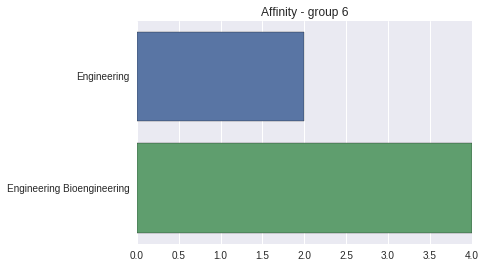

ME
count    15.000000
mean      1.466667
std       0.743223
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: me, dtype: float64

ECE
count    15.00000
mean      5.20000
std       2.17781
min       2.00000
25%       4.00000
50%       5.00000
75%       7.00000
max       9.00000
Name: ece, dtype: float64


BIO
count    15.000000
mean      0.333333
std       0.617213
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       2.000000
Name: bio, dtype: float64

DESIGN
count    15.000000
mean      3.266667
std       0.457738
min       3.000000
25%       3.000000
50%       3.000000
75%       3.500000
max       4.000000
Name: design, dtype: float64

CS
count    15.000000
mean      3.200000
std       1.146423
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: cs, dtype: float64



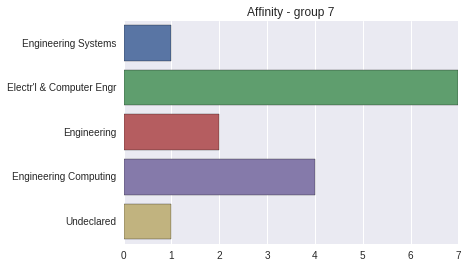

ME
count    16.000000
mean      1.562500
std       1.152895
min       1.000000
25%       1.000000
50%       1.000000
75%       1.250000
max       5.000000
Name: me, dtype: float64

ECE
count    16.00000
mean      4.68750
std       2.08866
min       2.00000
25%       3.75000
50%       4.00000
75%       6.00000
max      10.00000
Name: ece, dtype: float64


BIO
count    16.000000
mean      1.000000
std       1.505545
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       6.000000
Name: bio, dtype: float64

DESIGN
count    16.00000
mean      3.25000
std       0.57735
min       3.00000
25%       3.00000
50%       3.00000
75%       3.00000
max       5.00000
Name: design, dtype: float64

CS
count    16.000000
mean      3.062500
std       1.340087
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: cs, dtype: float64



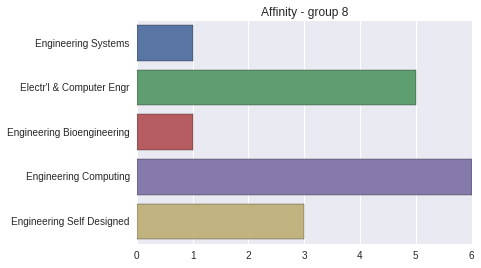

In [85]:
for (data, name) in [(T_kmeans, "KMeans"), (T_affinity, "Affinity")]:

    for group_idx in range(n_clusters):
        rows = [index for (index, val) in enumerate(data) if val == group_idx]
        student_ids = enrollment.iloc[rows].studentid
        group_students = students[students.studentid.isin(student_ids)]
        group_majors = group_students.finalmajor_full.values

        print 'ME'
        print group_students.me.describe()
        print ''
        
        print 'ECE'
        print group_students.ece.describe()
        print ''
        print ''
        
        print 'BIO'
        print group_students.bio.describe()
        print ''
        
        print 'DESIGN'
        print group_students.design.describe()
        print ''
        
        print 'CS'
        print group_students.cs.describe()
        print ''

        major_counts = {}
        for major in group_majors:
            major_counts[major] = major_counts.get(major, 0) + 1
        x = major_counts.keys()
        y = major_counts.values()
    
        plt.figure()
        plt.title(name + " - group " + str(group_idx+1))
        sns.barplot(y, x)
        plt.show()

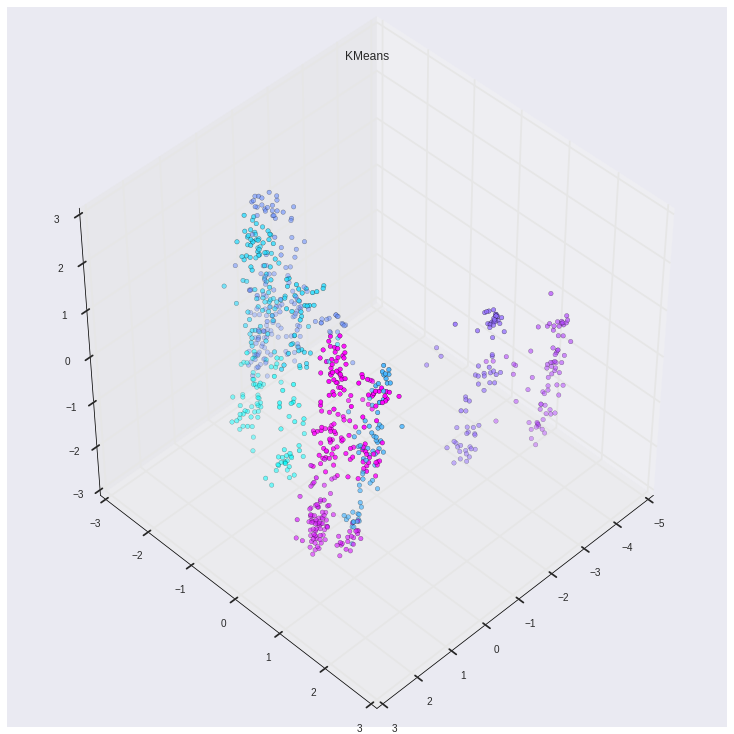

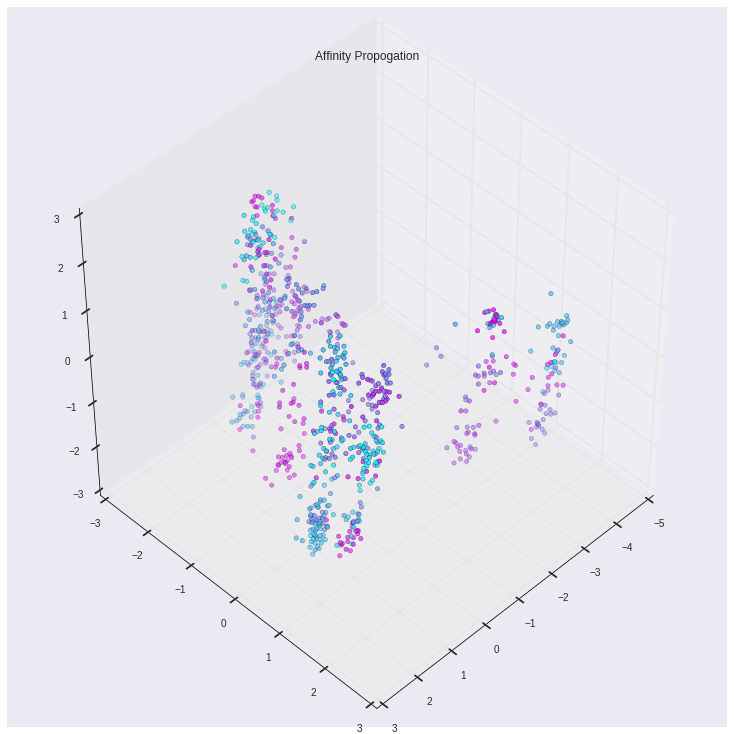

In [80]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
# plt.annotate(X_reduced[:, 0], X_reduced[:, 1], )
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=T_kmeans, cmap=plt.get_cmap('cool'))
ax.set_title('KMeans')

ax.view_init(45, 45)

fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
# plt.annotate(X_reduced[:, 0], X_reduced[:, 1], )
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=T_affinity, cmap=plt.get_cmap('cool'))
ax.set_title('Affinity Propogation')

ax.view_init(45, 45)

# plt.subplot(223)
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=T_spectral, cmap=plt.get_cmap('cool'))
# plt.title('Spectral Clustering')